In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Bootstrapping exercise
- There are two correlated stocks, $X$ and $Y$, which are normally distributed
- You will invest in both stocks with all your money
- Your goal is to find $\alpha \in [0,1]$ (the portion of your money invested in stock $X$) to minimize the variance of the portfolio, i.e.,
 $$ \mathbb{V}\mathrm{AR}[\alpha X + (1-\alpha)Y] $$
- You are given "returns.npy", a 2-D numpy array of the past $200$ returns of $(X,Y)$.

Exercise questions: 
1. Estimate $\mu_X, \mu_Y, \sigma_{X}^2, \sigma_{Y}^2, \sigma_{XY}$ from the sample, and then compute the optimal investment strategy $\alpha$
2. Since we estimated the parameters by looking at a sample, we may be severly biased. Hence, use bootstrapping to iteratively sample $200$ points (with replacement) from the previous returns, and estimate the optimal investment strategy each time. Apply this $B = 500$ times and compute the standard error of the optimal $\alpha$ that we computed on the original set of previous returns.

In [120]:
# load
returns = np.load('returns.npy')
n = 200

In [131]:
#Estimate mean returns
hat_mean = np.mean(returns,0)
hat_mean

array([2.97259589, 2.98935547])

In [132]:
#estimate covariance matrix
hat_cov = np.dot((returns - hat_mean).T, (returns - hat_mean))
hat_cov = hat_cov/(n-1)
hat_varx = round(hat_cov[0,0],3)
hat_vary = round(hat_cov[1,1],3)
hat_covar = round(hat_cov[0,1],3)
hat_varx, hat_vary, hat_covar

(1.291, 1.108, 0.465)

In [123]:
def optimal_alpha(varx, vary, covar):
    return (float) (vary - covar)/(varx + vary - 2*covar)

def sample_alpha(returns_df,n=200):
    mean = returns_df.mean()
    hat_cov = (returns_df - mean).T.dot((returns_df - mean))
    hat_cov = hat_cov/(n-1)
    hat_varx = hat_cov.loc[0,0]
    hat_vary = hat_cov.loc[1,1]
    hat_covar = hat_cov.loc[0,1]
    return optimal_alpha(hat_varx, hat_vary, hat_covar)

In [124]:
#estimate optimal investment
optimal_investment = optimal_alpha(hat_varx, hat_vary, hat_covar)
optimal_investment = round(optimal_investment,3)
print(optimal_investment)

0.437


0.056


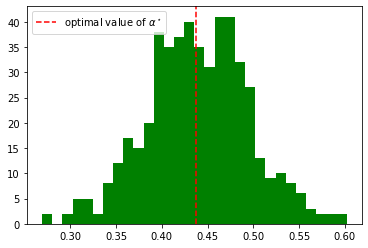

In [125]:
#use bootstrapping for std. error associated with this technique of finding the optimal investment
B = 500 #number of bootstraps
samples = n #sample n each time
estimations = np.zeros(B) #save estimated alphas
returns_df = pd.DataFrame(returns)
for sim in range(B): #simulate this many times
    generated_sample = returns_df.sample(n,replace=True) #sample with replacements
    estimations[sim] = sample_alpha(generated_sample)#write the optimized alpha on the sample
bootstrap_error = np.sqrt(np.sum(np.square(estimations - np.mean(estimations))/(B-1)))#fill in the formula
bootstrap_error = round(bootstrap_error, 3)
print(bootstrap_error)

#Histogram
plt.hist(estimations,  bins = 30, color = 'g')  # density=False would make counts
plt.axvline(x=optimal_investment, color='r', linestyle='--', label = r"optimal value of $\alpha^\star$")
plt.legend()
plt.show()

Report `optimal_investment` and `bootrap_error`

In [133]:
print('The optimal investment alpha is', optimal_investment)
print('Bootstrap error is ', bootstrap_error)

The optimal investment alpha is 0.437
Bootstrap error is  0.056
